In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

tf.random.set_seed(1)
np.random.seed(1)
os.environ['PYTHONHASHSEED']=str(1)
random.seed(1)

2021-11-24 00:24:40.219974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 00:24:40.220003: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


5


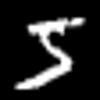

0


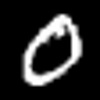

4


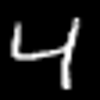

1


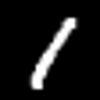

9


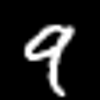

In [5]:
for i in range(0, 5):
    img = Image.fromarray(X_train[i])
    img = img.resize((100,100))
    print(y_train[i])
    display(img)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [8]:
y_train = to_categorical(y_train, num_classes=10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [11]:
# normalizing the data
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#creating the CNN
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(10))

model.add(Activation('softmax'))

2021-11-24 00:24:42.822515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 00:24:42.823101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 00:24:42.823207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-24 00:24:42.823282: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-24 00:24:42.825372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                        

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


model.fit(X_train,
          y_train,
          batch_size=32,
          validation_data=(X_val, y_val),
          epochs=5,
          verbose=True)

2021-11-24 00:24:42.983289: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1776 - accuracy: 0.9444 - val_loss: 0.0661 - val_accuracy: 0.9803
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.0522 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0471 - val_accuracy: 0.9858
Epoch 4/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 5/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0425 - val_accuracy: 0.9874


In [16]:
# ImageDataGenerator asks for a reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [17]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

df_data_aug = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False, # set each sample mean to 0
        featurewise_std_normalization=False,# divide inputs by std of the dataset
        samplewise_std_normalization=False, # divide each input by its std
        zca_whitening=False, # apply ZCA whitening
        rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
        horizontal_flip=False, # randomly flip images
        vertical_flip=False) # randomly flip images


df_data_aug.fit(X_train)

In [18]:
#creating the CNN
model2 = Sequential()

model2.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Dropout(0.2))

model2.add(Dense(10))

model2.add(Activation('softmax'))

In [19]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model2.fit(df_data_aug.flow(X_train, y_train, batch_size=32),
          validation_data = (X_val, y_val),
          epochs=5,
          verbose=True)

Epoch 1/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3595 - accuracy: 0.8876 - val_loss: 0.0816 - val_accuracy: 0.9751
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1481 - accuracy: 0.9540 - val_loss: 0.0611 - val_accuracy: 0.9823
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1112 - accuracy: 0.9646 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0977 - accuracy: 0.9704 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 5/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.0440 - val_accuracy: 0.9886


In [20]:
# inference

y_pred1 = model.predict(X_test)
y_pred2 = model2.predict(X_test)

y_classes1 = y_pred1.argmax(axis=-1)
y_classes2 = y_pred2.argmax(axis=-1)

acc1 = accuracy_score(y_test, y_classes1)
acc2 = accuracy_score(y_test, y_classes2)

In [21]:
print(acc1)
print(acc2)

0.9892
0.9905


In [22]:
df = pd.DataFrame(data=zip(y_test, y_classes2), columns=["y_test", "y_pred"])

df

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [23]:
# wrong results comp
df[df["y_test"] != df["y_pred"]]

,y_test,y_pred
151,9,8
193,9,8
320,9,8
582,8,2
593,9,8
...,...,...
9530,9,8
9679,6,1
9692,9,7
9698,6,1


In [24]:
# load dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

9


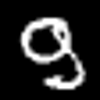

9


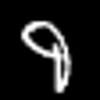

8


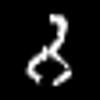

5


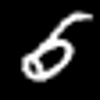

In [26]:
# wrong preds
list_diff = [151, 193, 582, 9729]

for i in list_diff:
    img = Image.fromarray(X_test[i])
    img = img.resize((100,100))
    print(y_test[i])
    display(img)